In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

In [2]:
soh = pd.read_csv(r"C:\Users\DELL\Desktop\Mini project\Discharge-25.csv")
soh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Voltage      89 non-null     float64
 1   Current      89 non-null     float64
 2   Temperature  89 non-null     float64
 3   Capacity     89 non-null     float64
dtypes: float64(4)
memory usage: 2.9 KB


In [3]:
a = []
a = round((soh['Capacity']/3)*100)

In [4]:
a = abs(a)
soh['SOH'] = a

In [5]:
soh.head()

,Voltage,Current,Temperature,Capacity,SOH
0,3.14413,-1.49925,24.29162,-2.38183,79.0
1,3.11092,-1.49670,24.60710,-2.40681,80.0
2,3.07738,-1.49670,24.71226,-2.43178,81.0
3,3.04198,-1.49670,24.71226,-2.45674,82.0
4,3.00169,-1.49925,24.29162,-2.48171,83.0


In [6]:
soh.tail()

,Voltage,Current,Temperature,Capacity,SOH
84,2.79976,-9.94307,25.02773,-2.55711,85.0
85,2.79993,-9.88433,25.02773,-2.55739,85.0
86,2.79976,-9.83580,25.02773,-2.55767,85.0
87,2.79976,-9.78216,25.02773,-2.55793,85.0
88,2.79976,-9.76173,25.02773,-2.55821,85.0


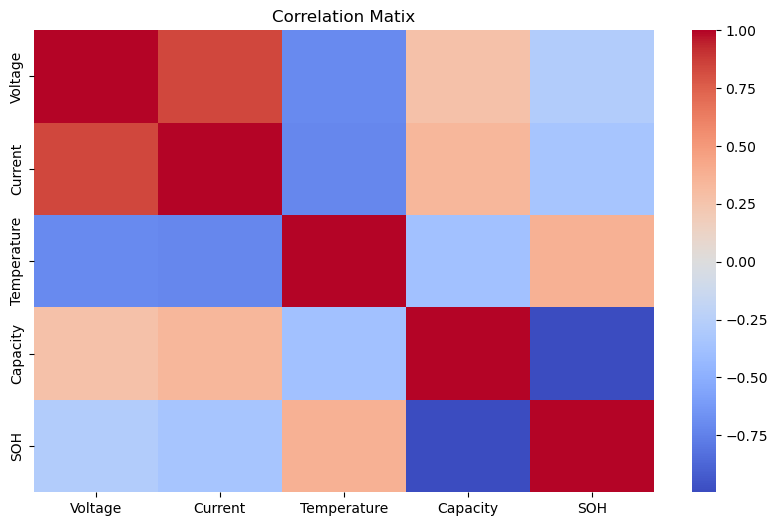

In [7]:
corr_matrix = soh.corr()

fig,ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr_matrix, cmap = 'coolwarm',ax = ax)
ax.set_title("Correlation Matix")

plt.show()

In [8]:
x = soh.iloc[:,:-1]
y = soh.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [11]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

In [12]:
model = SVR(kernel='poly',C=5,gamma=0.1)
model.fit(x_train,y_train)
predict = model.predict(x_test)

In [13]:
model.score(x_train,y_train)

0.9790511037431154

In [14]:
r2_score(y_test,predict)

0.985602040900152

In [15]:
mean_squared_error(y_test,predict)

0.034484000807043336

In [16]:
math.sqrt(mean_squared_error(y_test,predict))

0.1856986828360485

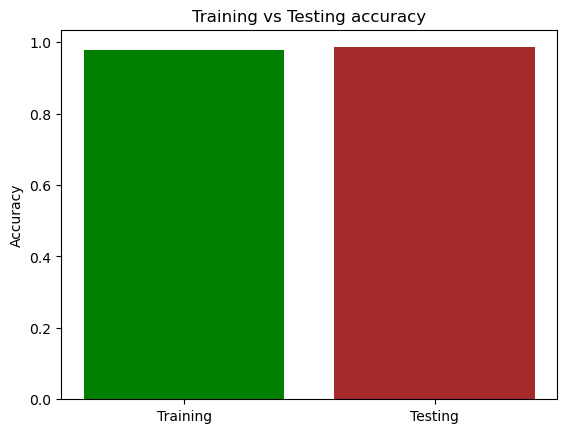

In [17]:
plt.bar(['Training','Testing'],[model.score(x_train,y_train),r2_score(y_test,predict)],color = ['green','brown'])
plt.title('Training vs Testing accuracy')
plt.ylabel('Accuracy')
plt.show()